#Load Data

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Data Science Portfolio/Data Analysis/4-Olympic Medals Dataset

/content/drive/MyDrive/Data Science Portfolio/Data Analysis/4-Olympic Medals Dataset


In [ ]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [ ]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [ ]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [ ]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [ ]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [ ]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [ ]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


#EDA

##Merging & Concatenating

In [ ]:
olympics = pd.concat([summer,winter], axis = 0, keys = ["summer", "winter"], names = ["Edition"]).reset_index().drop(columns = "level_1")
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [ ]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [ ]:
olympics = olympics.merge(dic.iloc[:, :2], how = "left",
               left_on = "Country", right_on = "Code").drop(columns = ["Code"])

In [ ]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [ ]:
olympics.reset_index(drop = True, inplace = True)

##Data Cleaning

In [ ]:
olympics.rename(columns = {"Country_x":"Code", "Country_y": "Country"}, inplace = True)

In [ ]:
dic.rename(columns = {"GDP per Capita":"GDP"}, inplace= True)

In [ ]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [ ]:
olympics.loc[olympics["Country"].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [ ]:
# missing countries
missing_C_index = olympics.loc[olympics["Country"].isna()].index

In [ ]:
olympics.loc[olympics["Country"].isna()]["Code"].value_counts()

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [ ]:
# index of old countries that doesn't exist anymore
old_c = olympics.loc[olympics["Country"].isna(), :]["Code"].value_counts().index
old_c

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [ ]:
mapper = pd.Series(index=old_c, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia",
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [ ]:
mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [ ]:
olympics.loc[missing_C_index, "Code"].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [ ]:
olympics["Country"].fillna(olympics["Code"].map(mapper), inplace = True)

In [ ]:
olympics.loc[missing_C_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


In [ ]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [ ]:
olympics.loc[olympics["Code"].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


In [ ]:
olympics.dropna(subset  = ["Code"], inplace = True)
olympics.reset_index(drop = True, inplace = True)

In [ ]:
# convert "Medal" type  to catgory
olympics["Medal"] = olympics["Medal"].astype("category")

In [ ]:
olympics["Medal"].cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True)

<ipython-input-412-ac5352309415>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  olympics["Medal"].cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True)


#What are the most successful countries of all times?

##What are the Top 10 Countries by total medals?

In [ ]:
top_10 = olympics["Country"].value_counts().head(10)
top_10

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

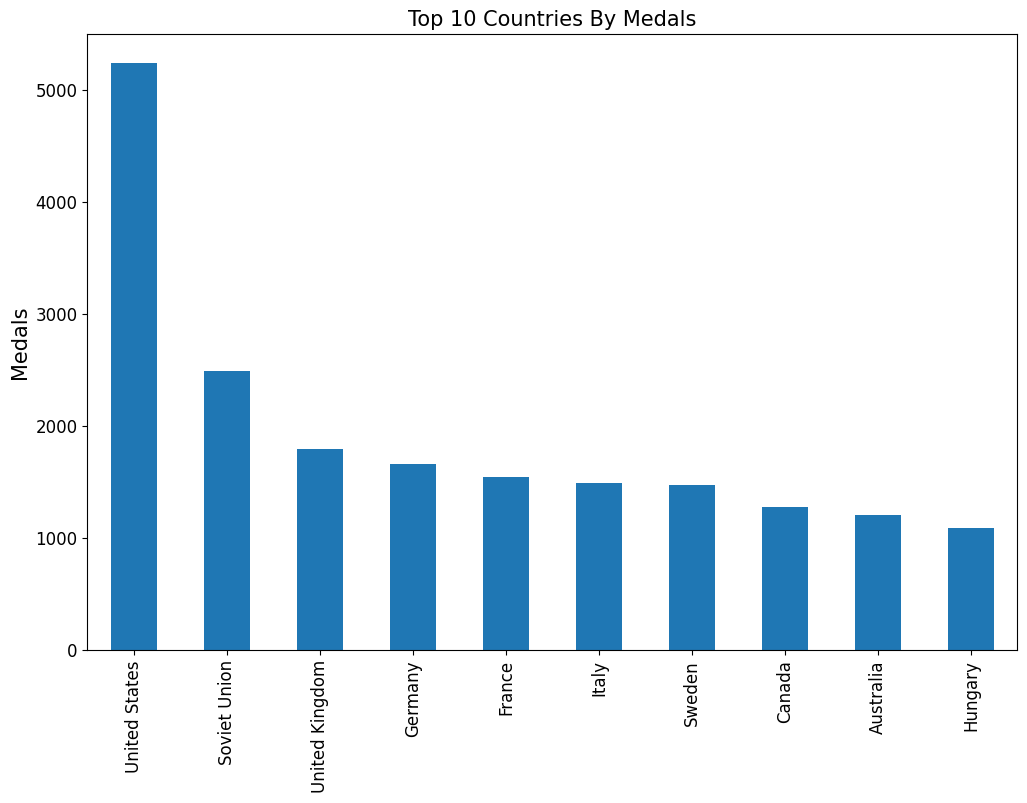

In [ ]:
top_10.plot(kind = "bar", figsize = (12, 8), fontsize = 12)
plt.ylabel("Medals", fontsize = (15))
plt.title("Top 10 Countries By Medals", fontsize = 15)
plt.show()

In [ ]:
# filter rows to those countries

olympics_10 = olympics[olympics["Country"].isin(top_10.index)]
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


<ipython-input-416-07be9a449369>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = olympics_10, x = "Country", palette = "dark", order = top_10.index)


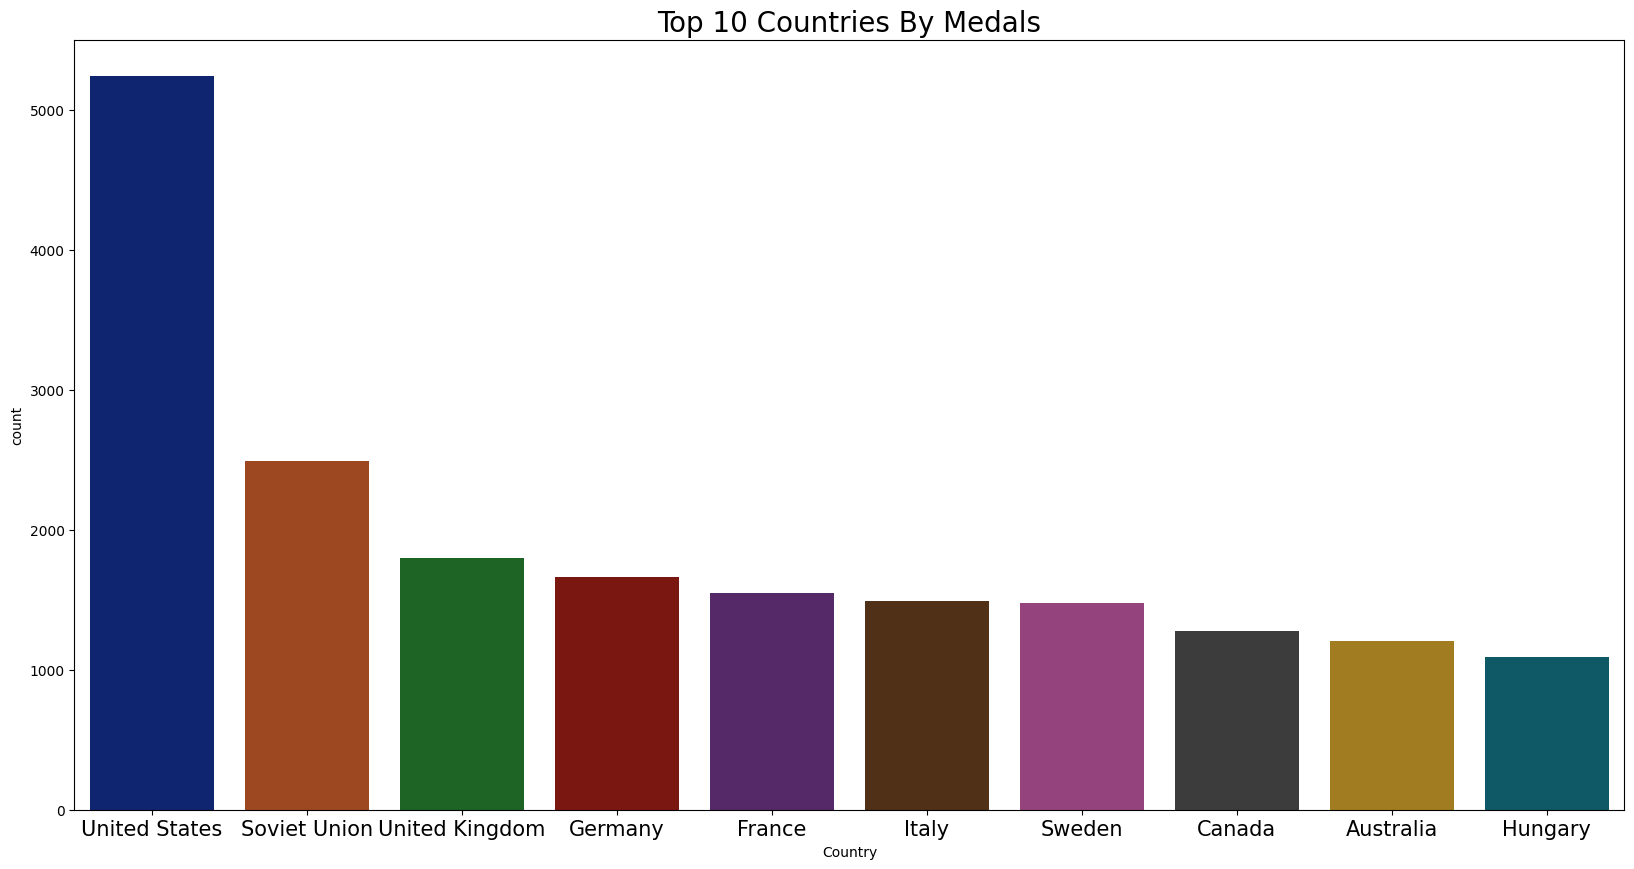

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(data = olympics_10, x = "Country", palette = "dark", order = top_10.index)
plt.title("Top 10 Countries By Medals", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

##Split the total medals of Top 10 Countries into Summer / Winter.

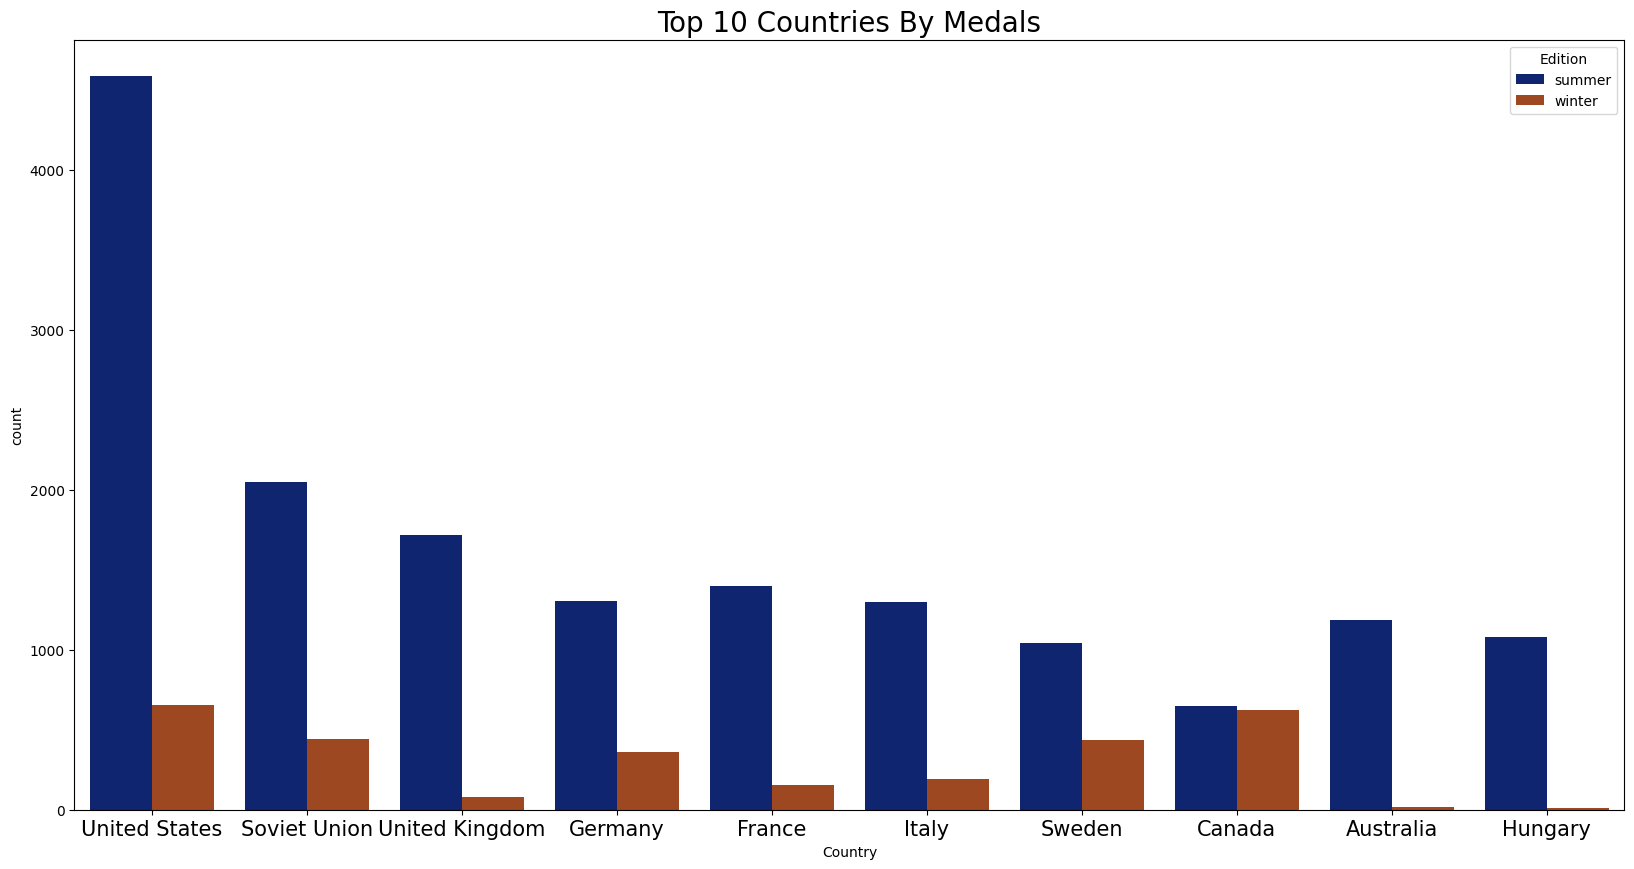

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(data = olympics_10, x = "Country", palette = "dark", order = top_10.index, hue = "Edition")
plt.title("Top 10 Countries By Medals", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

## Are there typical Summer/Winter Games Countries?

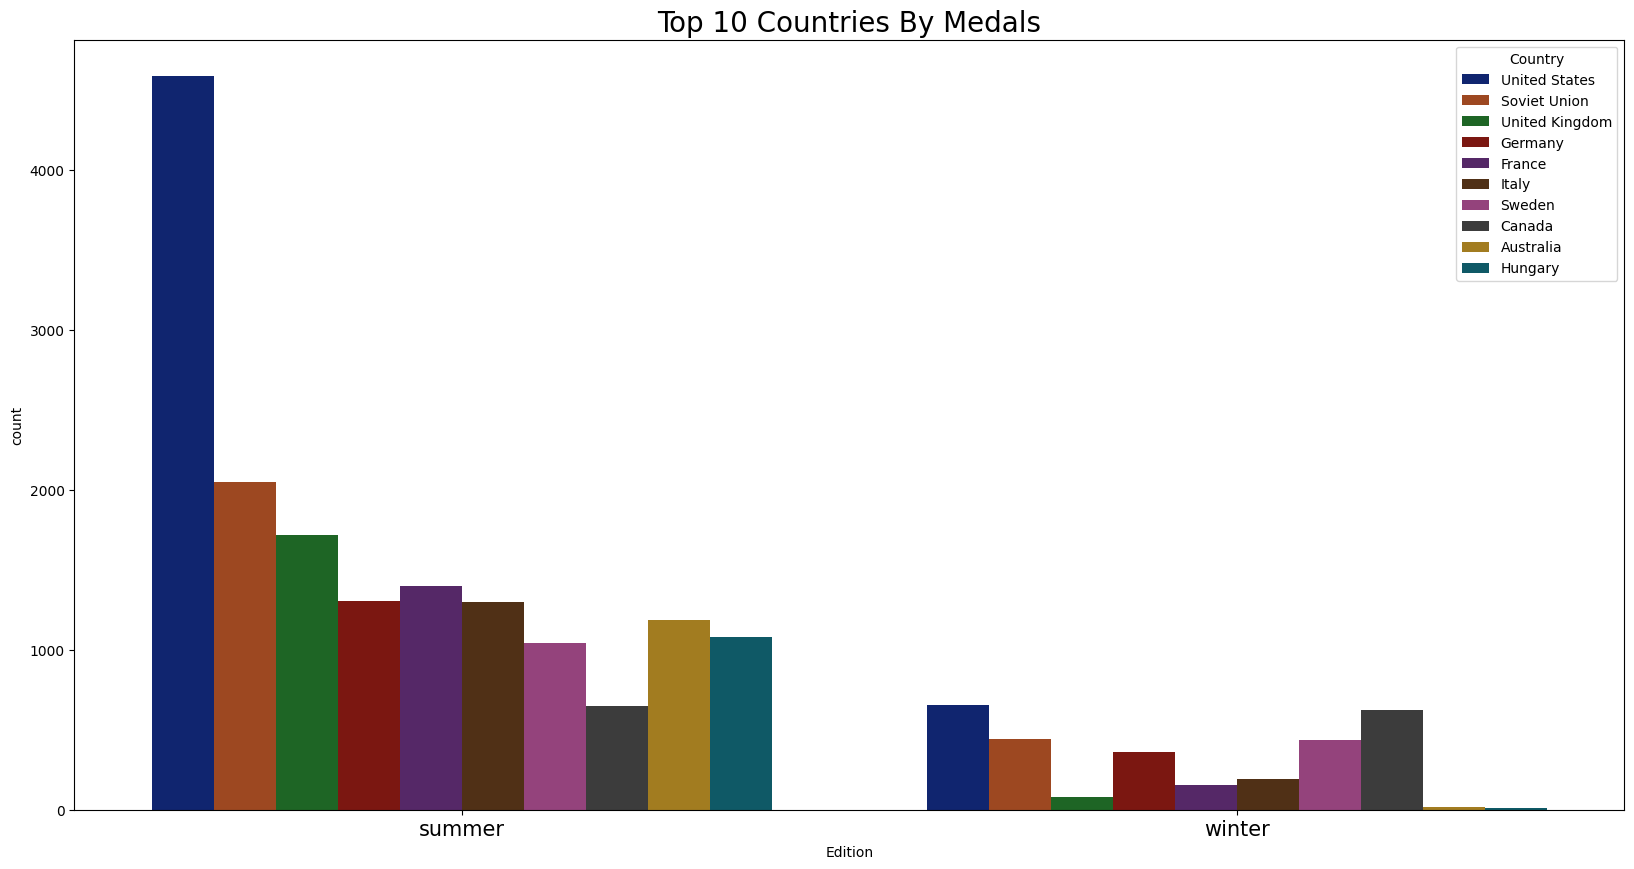

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(data = olympics_10, x = "Edition", palette = "dark", hue_order = top_10.index, hue = "Country")
plt.title("Top 10 Countries By Medals", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

##Total medals of Top 10 Countries in Gold, Silver, Bronze.

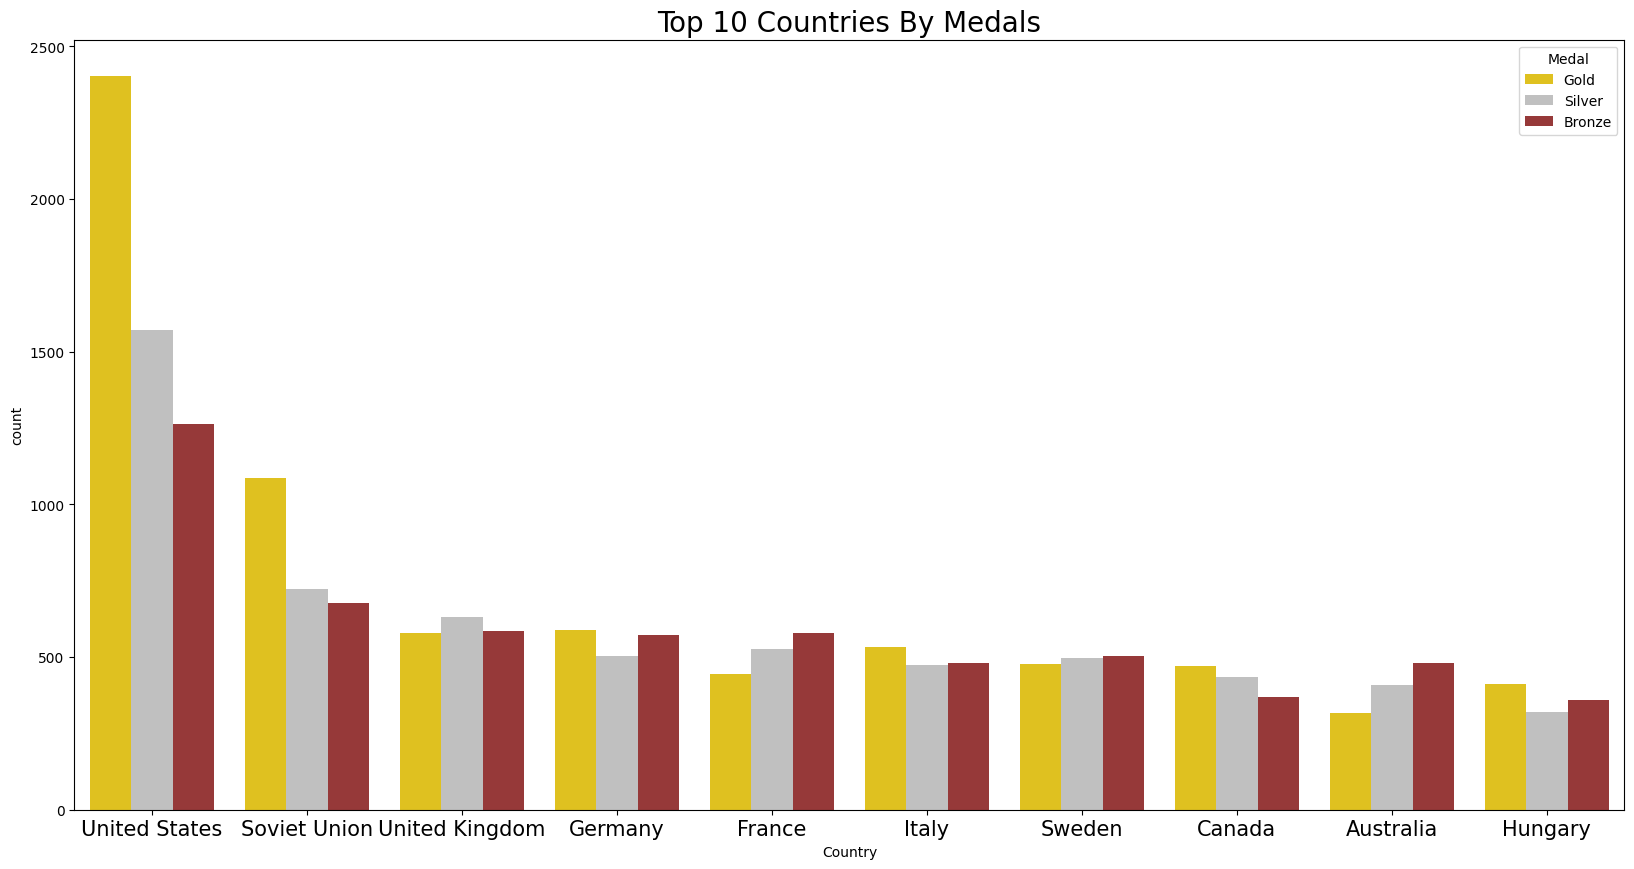

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(data = olympics_10, x = "Country", palette = ["gold", "silver", "brown"], order = top_10.index, hue = "Medal", hue_order = ["Gold", "Silver", "Bronze"])
plt.title("Top 10 Countries By Medals", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

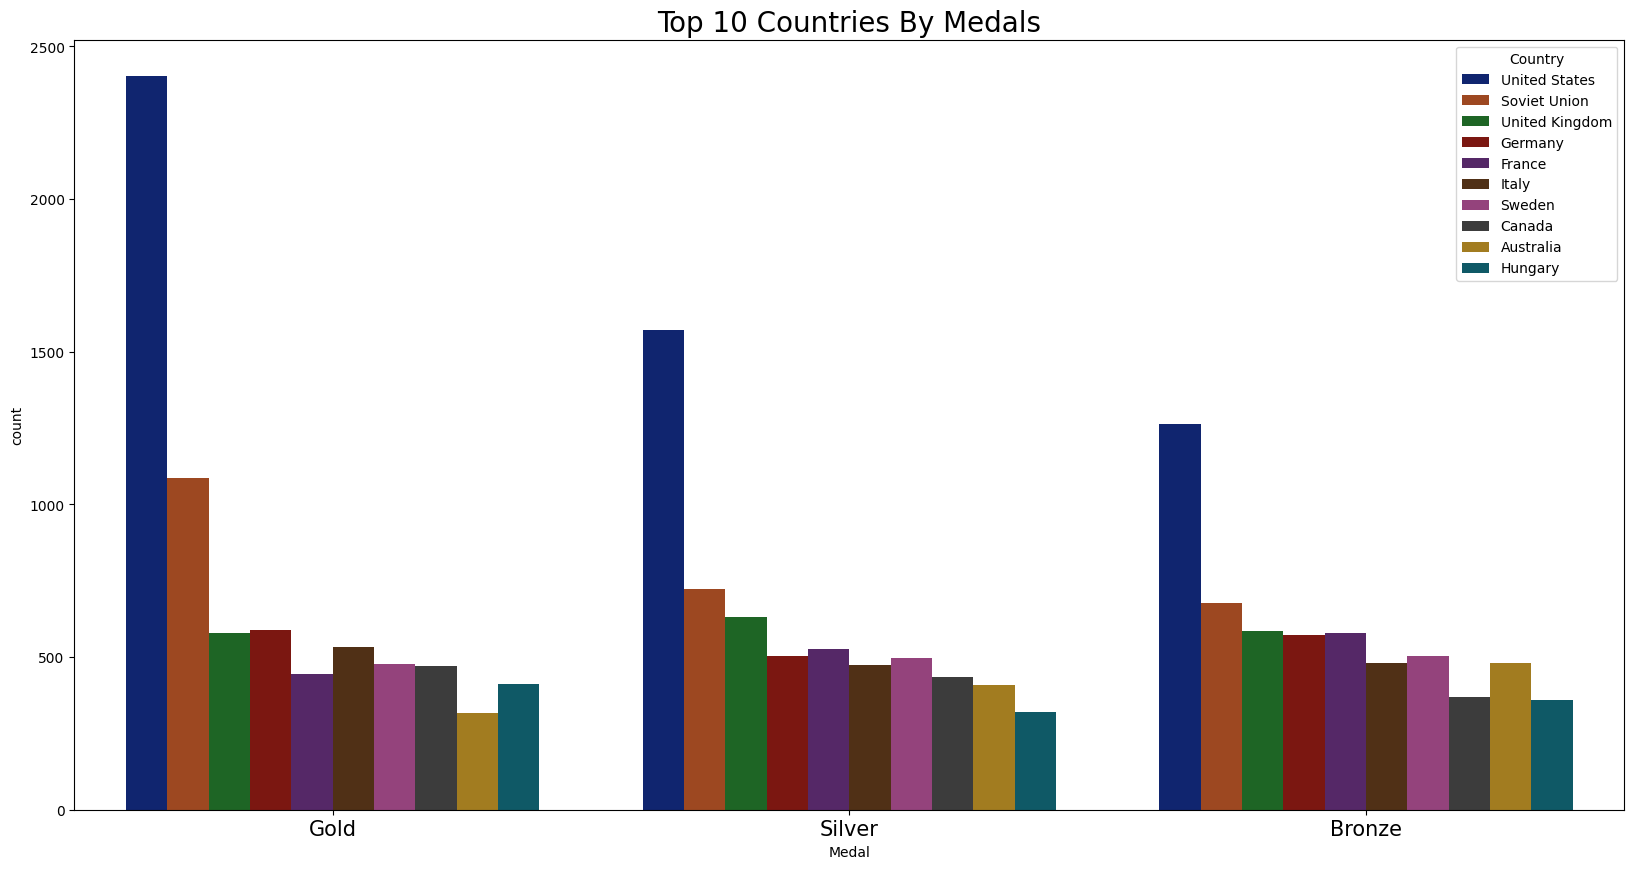

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(data = olympics_10, x = "Medal", palette = "dark", hue_order = top_10.index, hue = "Country", order = ["Gold", "Silver", "Bronze"])
plt.title("Top 10 Countries By Medals", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

#Do GDP, Population and Politics matter?

-countries that participated in most of games are more successful than countries that participated in 1 or 2 games.

In [ ]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [ ]:
medals_per_country = pd.crosstab(index = olympics["Country"] , columns = olympics["Medal"] , margins = True , margins_name = "Total" )
medals_per_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29
...,...,...,...,...
West Indies Federation,5,0,0,5
Yugoslavia,119,180,143,442
Zambia,1,1,0,2


In [ ]:
medals_per_country.drop("Total", axis = 0, inplace = True)

In [ ]:
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"]].sort_values(by = ["Total", "Gold", "Silver", "Bronze"], ascending = False)
medals_per_country

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
...,...,...,...,...
Iraq,1,0,0,1
Macedonia,1,0,0,1
Mauritius,1,0,0,1


In [ ]:
dic

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [ ]:
# appears that country's success plays an important role in number of models
medals_per_country = medals_per_country.merge(dic, how = "left", left_on = medals_per_country.index , right_on = "Country").drop(columns = ["Code"]).set_index("Country")

In [ ]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

In [ ]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [ ]:
# create column "Games" per year & city
olympics["Games"] = olympics.apply(lambda x: str(x["Year"]) + " " + str(x["City"]), axis =1)

In [ ]:
# number of games
olympics["Games"].nunique()

49

In [ ]:
olympics["Games"].value_counts()

2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1945
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1956 Melbourne / Stockholm      885
1912 Stockholm                  885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris                  

In [ ]:
olympics.groupby("Country").apply(lambda x:x["Games"].nunique())

Country
Afghanistan                2
Algeria                    6
Argentina                 18
Armenia                    4
Australasia                2
                          ..
West Germany              12
West Indies Federation     1
Yugoslavia                18
Zambia                     2
Zimbabwe                   3
Length: 145, dtype: int64

In [ ]:
# create column for number of games won
medals_per_country["Total_Games"] = olympics.groupby("Country").apply(lambda x: x["Games"].nunique())

In [ ]:
medals_per_country.head(10)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Germany,1665,589,504,572,81413145.0,41313.313995,25
France,1548,444,526,578,66808385.0,36205.568102,47
Italy,1488,534,473,481,60802085.0,29957.804315,43
Sweden,1477,476,496,505,9798871.0,50579.673649,47
Canada,1274,470,435,369,35851774.0,43248.529909,47
Australia,1204,317,408,479,23781169.0,56310.962993,30


In [ ]:
# top 10 countries by rank
medals_per_country.rank(ascending = False).head(10)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,7.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,20.0,13.0,10.0
Germany,4.0,3.0,5.0,5.0,15.0,18.0,19.0
France,5.0,8.0,4.0,4.0,19.0,22.0,3.0
Italy,6.0,5.0,7.0,7.0,21.0,25.0,9.0
Sweden,7.0,6.0,6.0,6.0,71.0,10.0,3.0
Canada,8.0,7.0,8.0,12.0,35.0,15.0,3.0
Australia,9.0,13.0,9.0,8.0,46.0,6.0,14.0


In [ ]:
medals_per_country.drop(columns = [ "Gold", "Silver", "Bronze"], inplace = True)
medals_per_country

,Total,Population,GDP,Total_Games
Country,,,,
United States,5238,321418820.0,56115.718426,48
Soviet Union,2489,NaN,NaN,18
United Kingdom,1799,65138232.0,43875.969614,42
Germany,1665,81413145.0,41313.313995,25
France,1548,66808385.0,36205.568102,47
...,...,...,...,...
Iraq,1,36423395.0,4943.760388,1
Macedonia,1,2078453.0,4852.657848,1
Mauritius,1,1262605.0,9252.110724,1


In [ ]:
# test realtion hip between size and success,wealth and success,politcal stapility and successare just random or statistcally significant

In [ ]:
# pearson is restrictive as it only asses linear rlationship and statistical tsts assume variables are normally distributed
medals_per_country.corr(method = "pearson")

,Total,Population,GDP,Total_Games
Total,1.000000,0.206606,0.437131,0.712917
Population,0.206606,1.000000,-0.089976,0.123700
GDP,0.437131,-0.089976,1.000000,0.563540
Total_Games,0.712917,0.123700,0.563540,1.000000


In [ ]:
medals_per_country.corr(method = "spearman")

,Total,Population,GDP,Total_Games
Total,1.000000,0.419755,0.458478,0.927611
Population,0.419755,1.000000,-0.239097,0.402098
GDP,0.458478,-0.239097,1.000000,0.498056
Total_Games,0.927611,0.402098,0.498056,1.000000


In [ ]:
# asses the relationship between the ranks, not the absolute values but the relative rankings
medals_per_country.rank(ascending = False).corr(method = "pearson")

,Total,Population,GDP,Total_Games
Total,1.000000,0.419634,0.458508,0.927611
Population,0.419634,1.000000,-0.239567,0.401448
GDP,0.458508,-0.239567,1.000000,0.497109
Total_Games,0.927611,0.401448,0.497109,1.000000


Hypothesis 1 : There is no relationship between Total Medals & Population

In [ ]:
# means to say spearman rank correlation is szero,so thats the hypthesis we want to reject
# we can caluculate and its called p value of the test

In [ ]:
r, p_value = stats.spearmanr(medals_per_country["Total"], medals_per_country["Population"],
                             nan_policy = "omit")
r, p_value
# results of hypothesis test

(0.41975527887063924, 8.132240868116897e-07)

In [ ]:
round(p_value)

0

Reject Hypothesis 1 -> There is a significant (positive) relationship between Total Medals and Population

Hypothesis 2: There is no relationship between Total Medals and GDP per Capita

In [ ]:
r, p_value = stats.spearmanr(medals_per_country["Total"], medals_per_country["GDP"],
                             nan_policy = "omit")

In [ ]:
p_value

1.5758169913239602e-07

Reject Hypothesis 2 -> There is a significant (positive) relationship between Total Medals and GDP per Capita

Hypothesis 3: There is no relationship between Total Medals and Participations

In [ ]:
medals_per_country.head(50)

,Total,Population,GDP,Total_Games
Country,,,,
United States,5238,3.214188e+08,56115.718426,48
Soviet Union,2489,NaN,NaN,18
United Kingdom,1799,6.513823e+07,43875.969614,42
Germany,1665,8.141314e+07,41313.313995,25
France,1548,6.680838e+07,36205.568102,47
Italy,1488,6.080208e+07,29957.804315,43
Sweden,1477,9.798871e+06,50579.673649,47
Canada,1274,3.585177e+07,43248.529909,47
Australia,1204,2.378117e+07,56310.962993,30


In [ ]:
r, p_value = stats.spearmanr(medals_per_country.head(50)["Total"],
                             medals_per_country.head(50)["Total_Games"])

In [ ]:
p_value

4.982151209468708e-08

Reject Hypothesis 3 -> There is a significant (positive) relationship between Total Medals and Participations

In [ ]:
#Aggregating & Rating

In [ ]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [ ]:
sum_vs_win = pd.crosstab(olympics["Country"], olympics["Edition"])
sum_vs_win

Edition,summer,winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [ ]:
men_vs_women =  pd.crosstab(olympics["Country"], olympics["Gender"])
men_vs_women

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [ ]:
medals_by_cats = pd.concat([sum_vs_win, men_vs_women], axis =1)
medals_by_cats

,summer,winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [ ]:
medals_by_cats["Total"] = medals_by_cats["summer"] + medals_by_cats["winter"]
medals_by_cats

,summer,winter,Men,Women,Total
Country,,,,,
Afghanistan,2,0,2,0,2
Algeria,15,0,12,3,15
Argentina,259,0,187,72,259
Armenia,11,0,11,0,11
Australasia,29,0,27,2,29
...,...,...,...,...,...
West Germany,490,94,450,134,584
West Indies Federation,5,0,5,0,5
Yugoslavia,435,7,379,63,442


In [ ]:
medals_by_cats.sort_values("Total", ascending = False, inplace = True)
medals_by_cats
# there are more summer games than winter,and historiccally males were more participating

,summer,winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Iraq,1,0,1,0,1
Senegal,1,0,1,0,1
Macedonia,1,0,1,0,1


In [ ]:
# to compare relative success,use rank method
ranks = medals_by_cats.rank(ascending = False, method = "average")
ranks

,summer,winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
...,...,...,...,...,...
Iraq,132.5,95.5,127.0,120.0,133.5
Senegal,132.5,95.5,127.0,120.0,133.5
Macedonia,132.5,95.5,127.0,120.0,133.5


In [ ]:
top_50 = ranks.head(50)

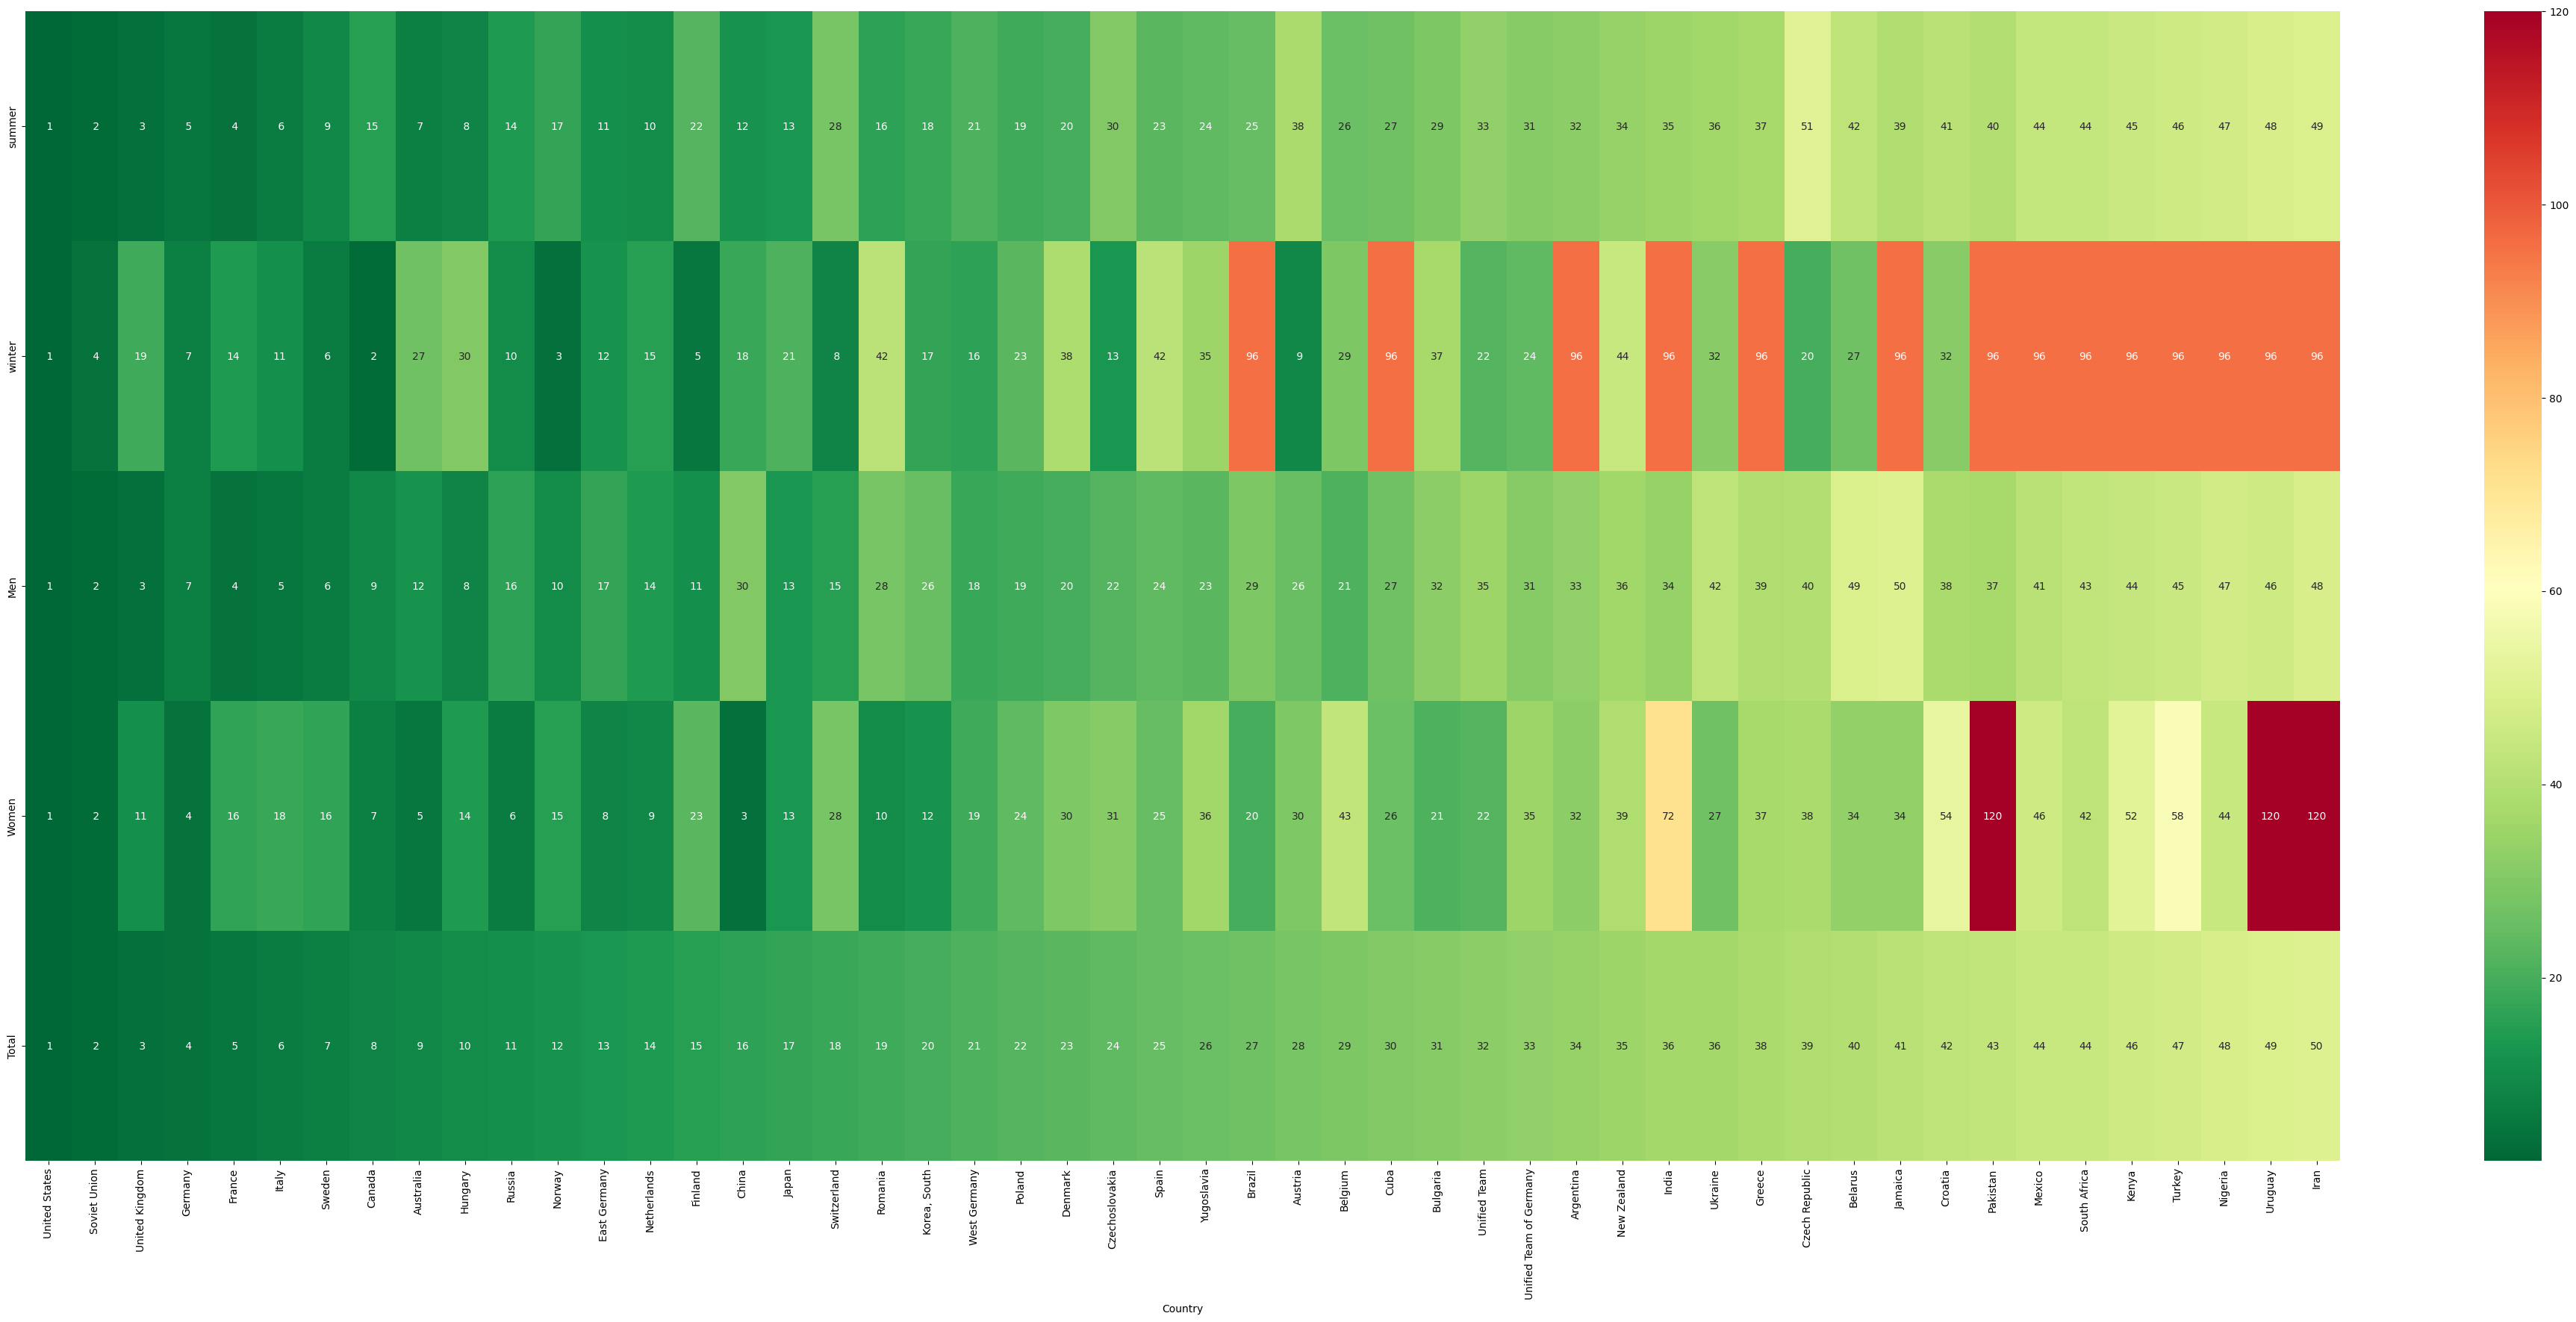

In [ ]:
plt.figure(figsize = (50, 20))
sns.heatmap(top_50.T, cmap = 'RdYlGn_r', annot = True, fmt = '2.0f')
plt.show()

#Summer Games vs. Winter Games - Does Geographical Location Matter?

In [ ]:
top_50.sort_values("summer")

,summer,winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
France,4.0,14.0,4.0,16.5,5.0
Germany,5.0,7.0,7.0,4.0,4.0
Italy,6.0,11.0,5.0,18.0,6.0
Australia,7.0,27.0,12.0,5.0,9.0
Hungary,8.0,30.0,8.0,14.0,10.0
Sweden,9.0,6.0,6.0,16.5,7.0


In [ ]:
top_50.sort_values("winter")

,summer,winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Canada,15.0,2.0,9.0,7.0,8.0
Norway,17.0,3.0,10.0,15.0,12.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
Finland,22.0,5.0,11.0,23.0,15.0
Sweden,9.0,6.0,6.0,16.5,7.0
Germany,5.0,7.0,7.0,4.0,4.0
Switzerland,28.0,8.0,15.0,28.0,18.0
Austria,38.0,9.0,25.5,29.5,28.0


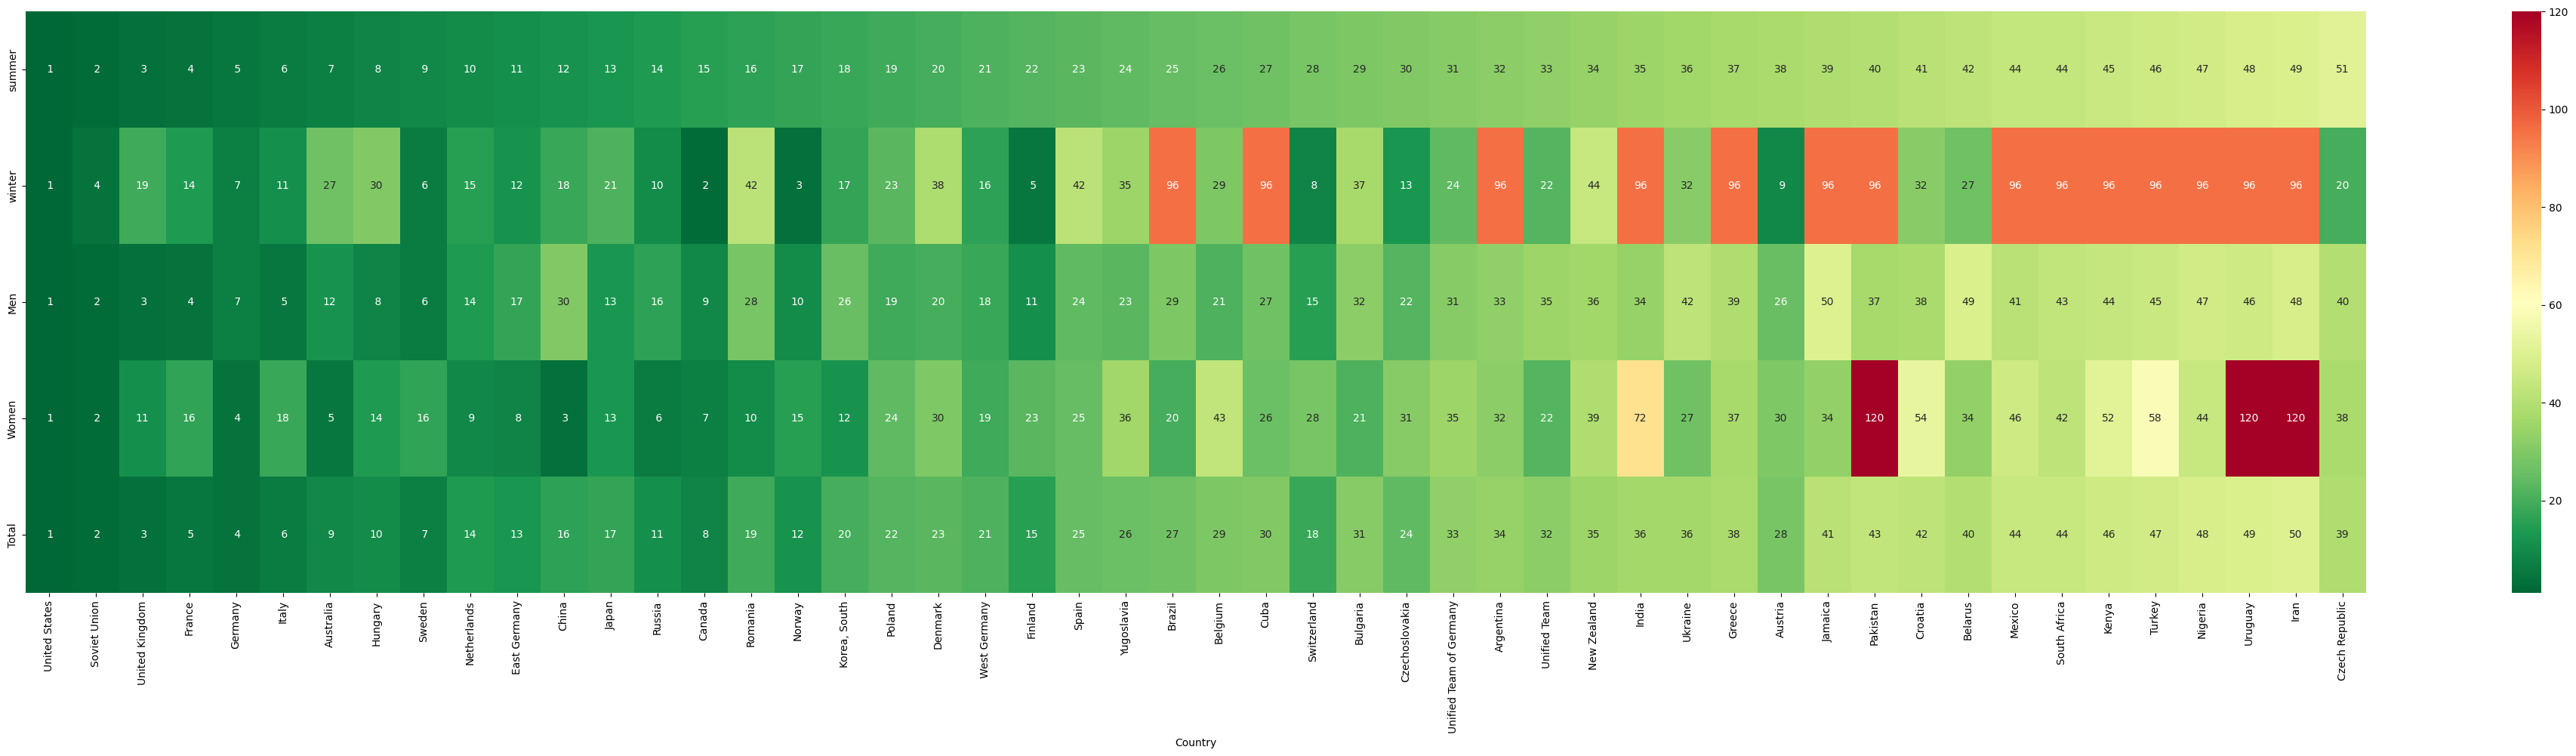

In [ ]:
#top 50 countries ranked by summer olympic medals
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "summer").T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

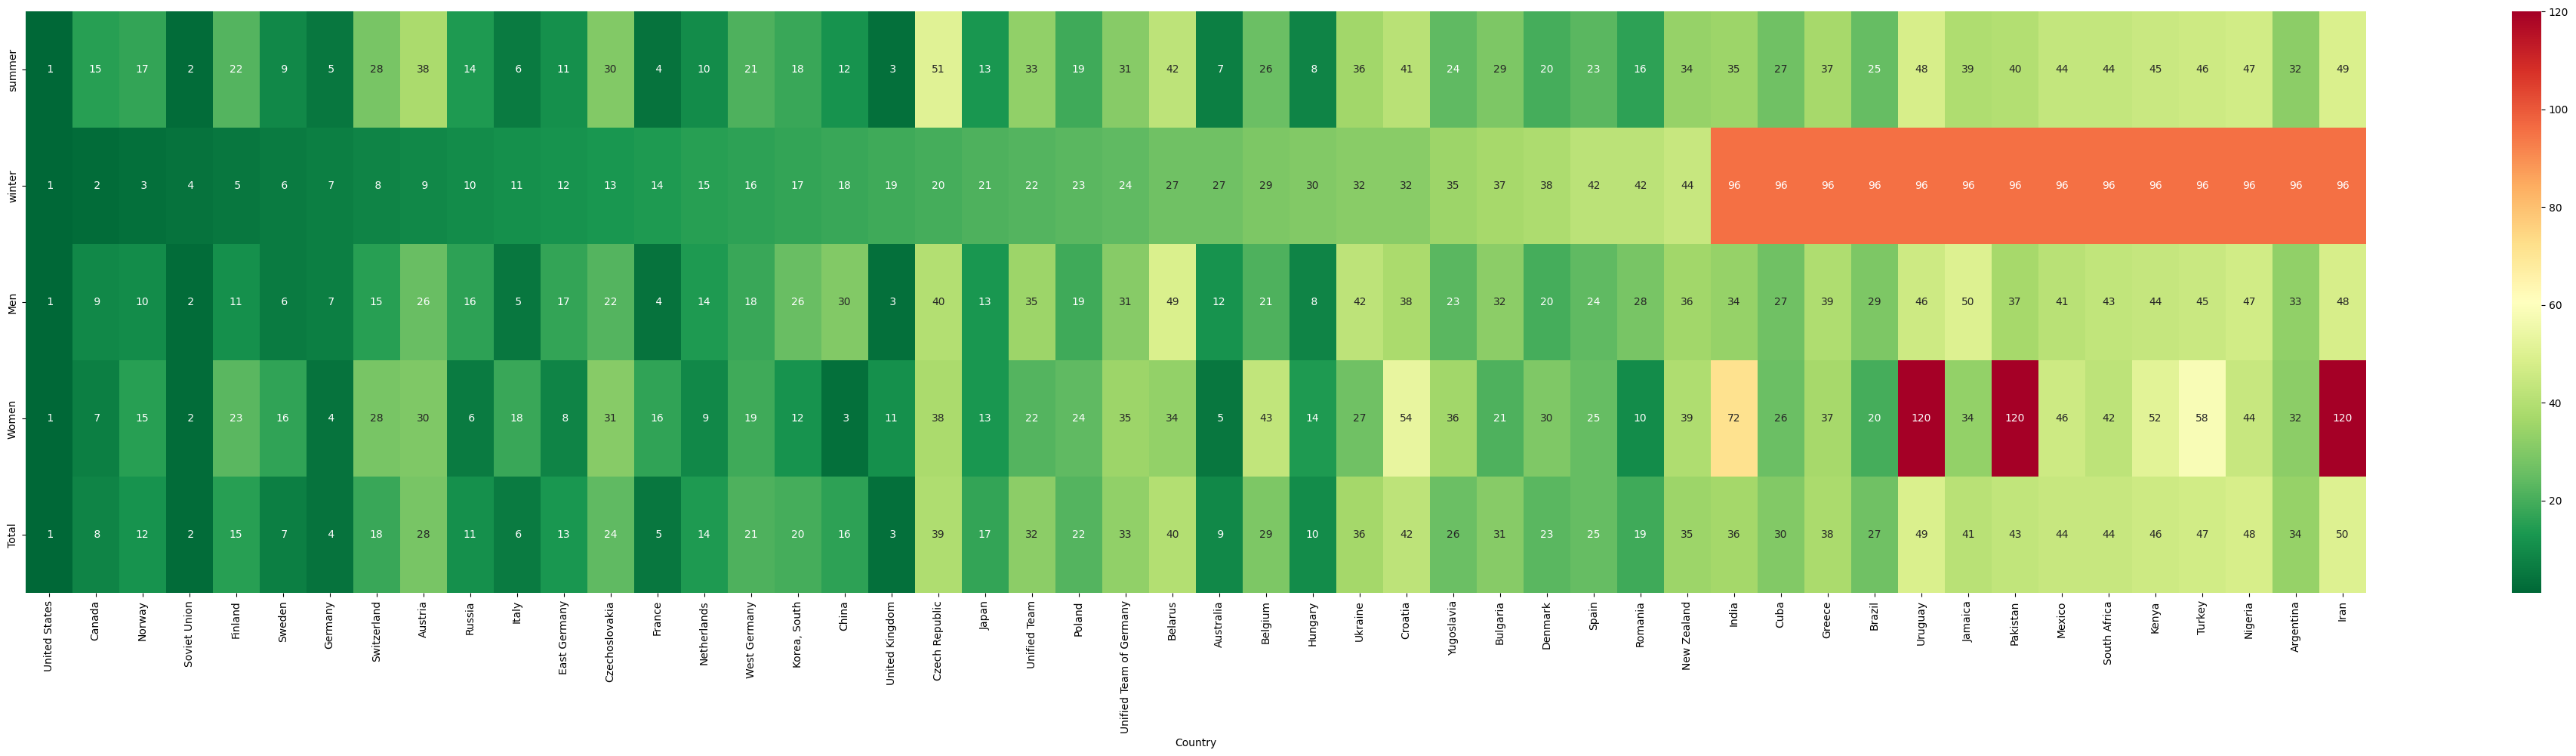

In [ ]:
#top 50 countries ranked by winter olympic medals
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "winter").T, cmap='RdYlGn_r', annot=True, fmt='2.0f')
plt.show()
# top countries are the ones with long winters

In [ ]:
top_50

,summer,winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
Italy,6.0,11.0,5.0,18.0,6.0
Sweden,9.0,6.0,6.0,16.5,7.0
Canada,15.0,2.0,9.0,7.0,8.0
Australia,7.0,27.0,12.0,5.0,9.0


In [ ]:
(top_50["summer"] - top_50["winter"]).sort_values()
 #top countries are summer countries & lower is winter countries

Country
Brazil                    -70.5
Cuba                      -68.5
Argentina                 -63.5
India                     -60.5
Greece                    -58.5
Jamaica                   -56.5
Pakistan                  -55.5
South Africa              -52.0
Mexico                    -52.0
Kenya                     -50.5
Turkey                    -49.5
Nigeria                   -48.5
Uruguay                   -47.5
Iran                      -46.5
Romania                   -25.5
Hungary                   -22.0
Australia                 -20.0
Denmark                   -18.5
Spain                     -18.5
United Kingdom            -16.0
Yugoslavia                -11.0
New Zealand               -10.5
France                    -10.0
Japan                      -8.0
Bulgaria                   -8.0
China                      -6.0
Netherlands                -5.0
Italy                      -5.0
Poland                     -4.0
Belgium                    -3.0
Soviet Union               -2.0


In [ ]:
rank_diff = (top_50["summer"] - top_50["winter"]).sort_values().to_frame()
rank_diff

,0
Country,
Brazil,-70.5
Cuba,-68.5
Argentina,-63.5
India,-60.5
Greece,-58.5
Jamaica,-56.5
Pakistan,-55.5
South Africa,-52.0
Mexico,-52.0


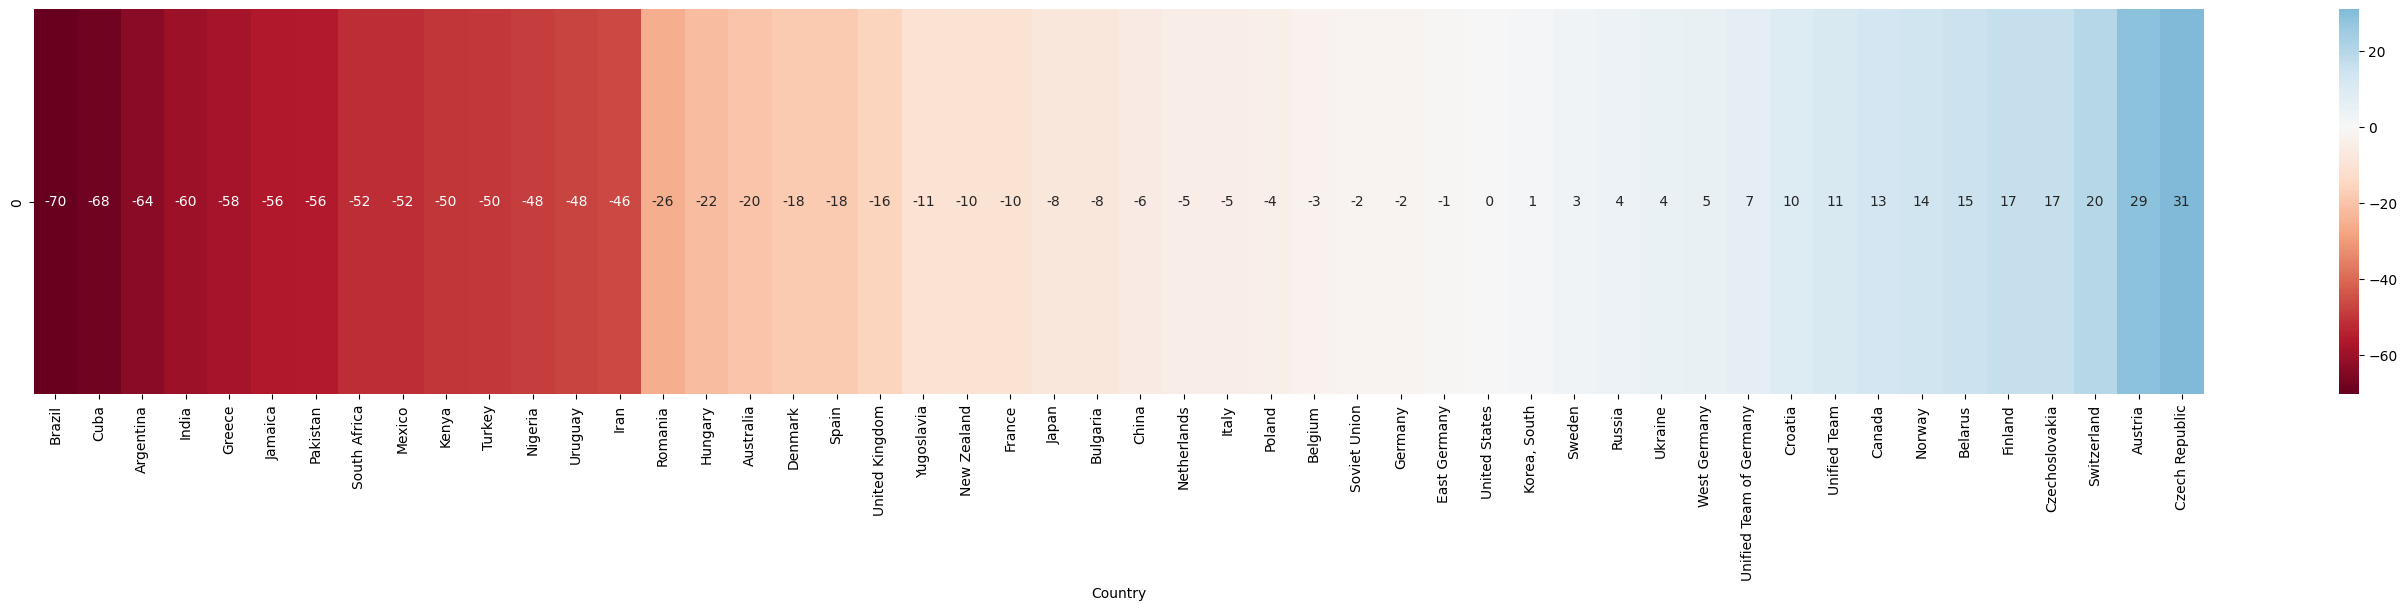

In [ ]:
# heatmap of rank differences between summer and winter olympic medals
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff.T,cmap='RdBu',annot=True,fmt='2.0f', center = 0)
plt.show()
# on left is summer countries,on right is winter countries.
# middle countries are equal successful in summer & winter games,they have geographical & climatic diversity
# we conclude that geographical & climatic diversity is a key to overall success

#Men vs. Women - Does Culture & Religion matter?

In [ ]:
top_50

,summer,winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
Italy,6.0,11.0,5.0,18.0,6.0
Sweden,9.0,6.0,6.0,16.5,7.0
Canada,15.0,2.0,9.0,7.0,8.0
Australia,7.0,27.0,12.0,5.0,9.0


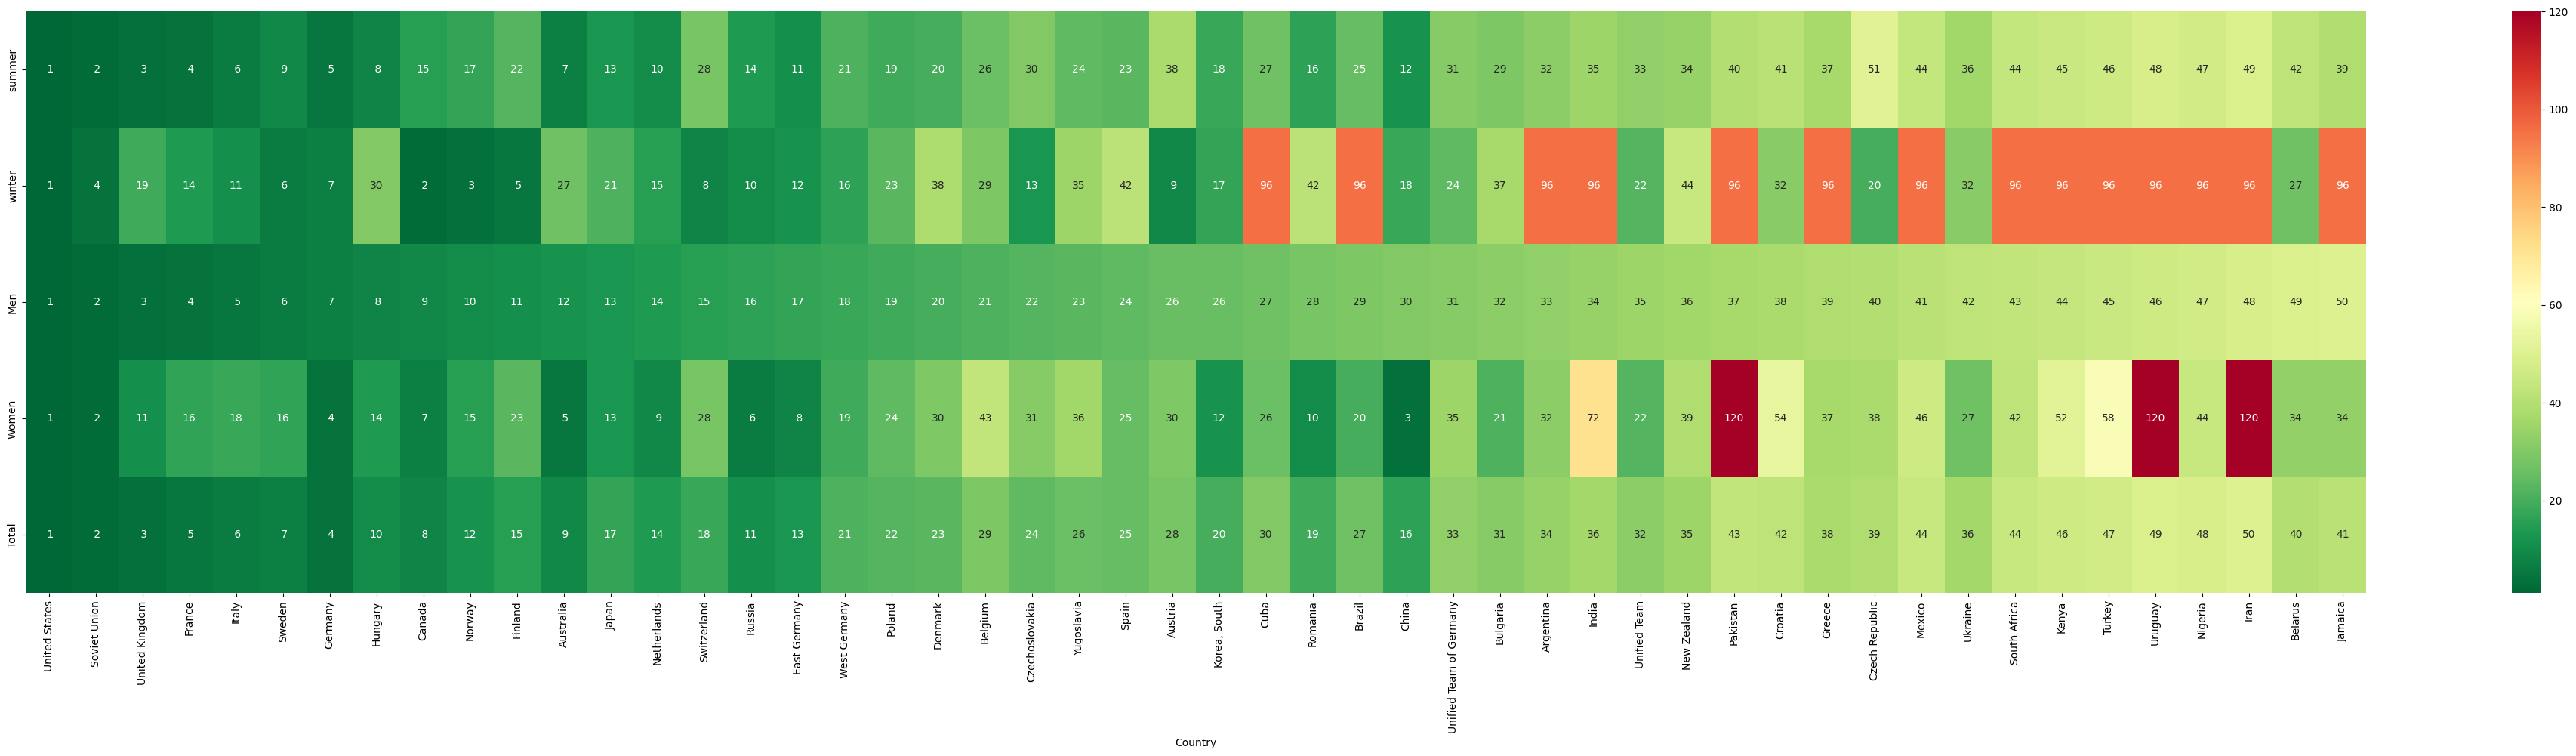

In [ ]:
# heatmap of top countries by men's medal count
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Men").T, annot = True, cmap='RdYlGn_r', fmt = "2.0f")
plt.show()

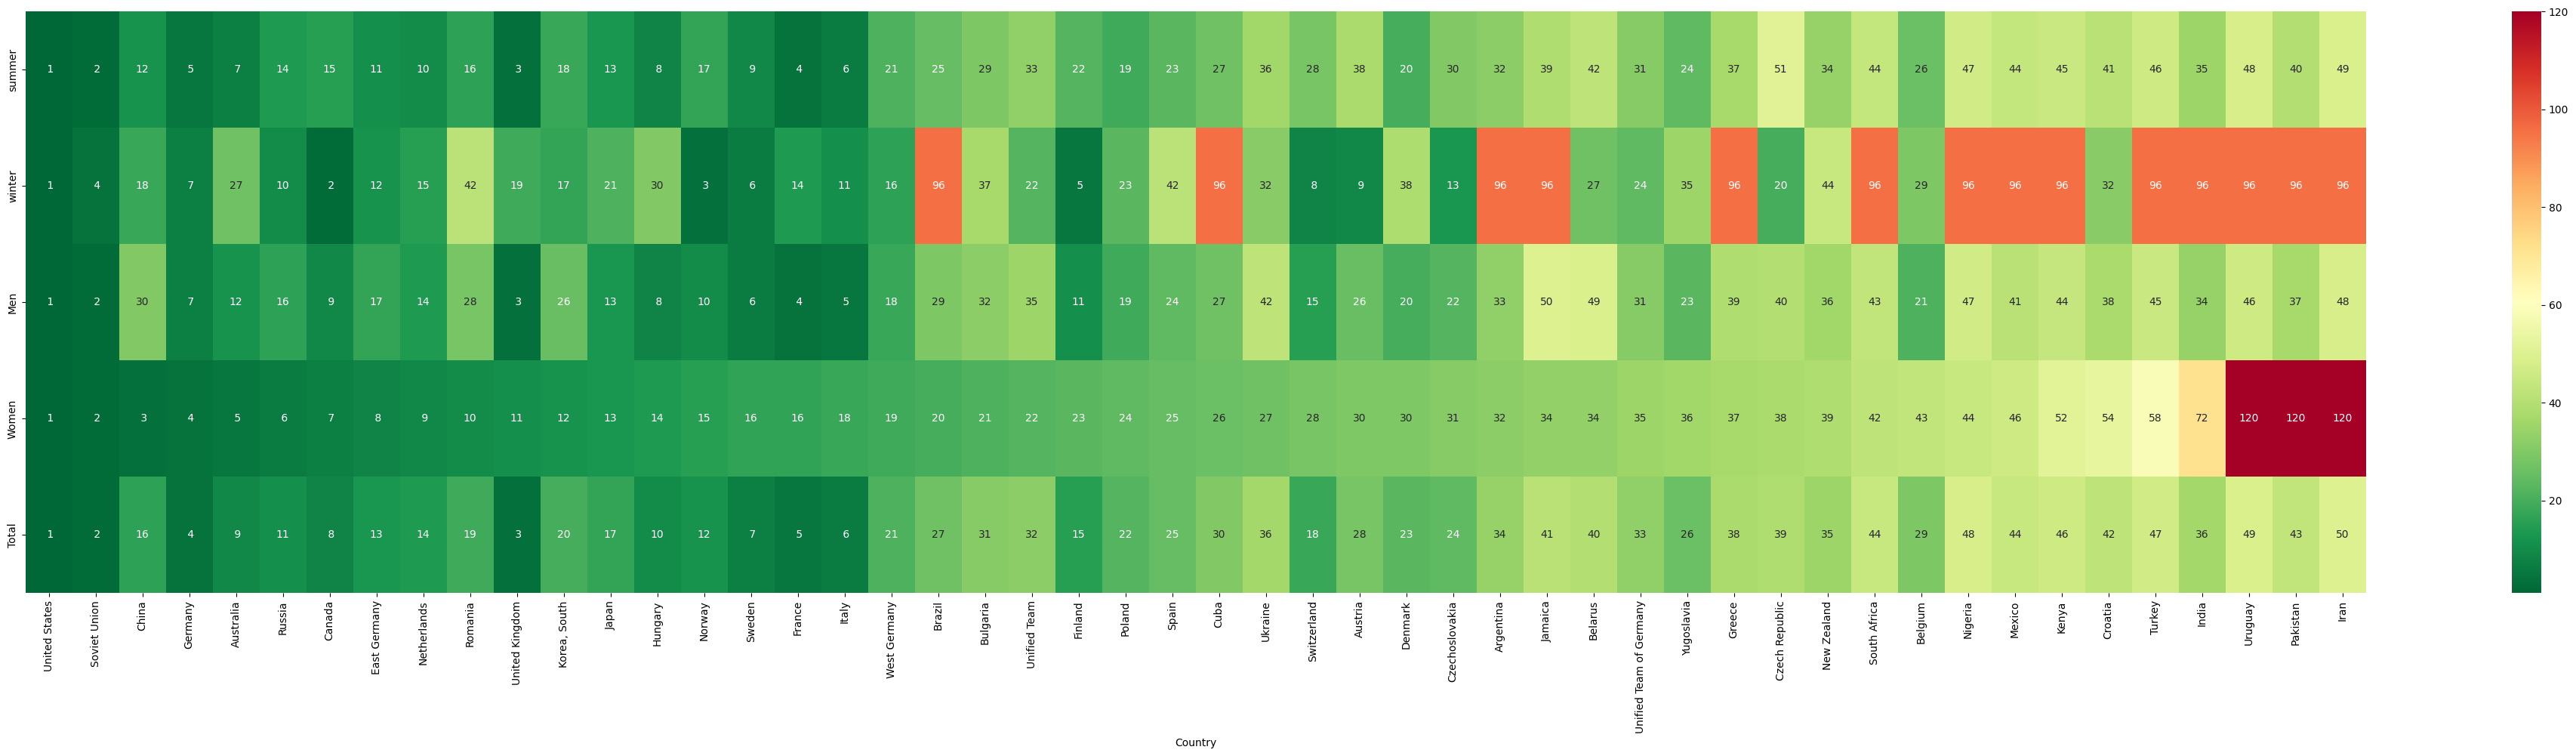

In [ ]:
# heatmap of top countries by women's medal count
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Women").T, annot = True, cmap='RdYlGn_r', fmt = "2.0f")
plt.show()

In [ ]:
# difference between number of men's medals and women's medals for top 50 countries
rank_diff2 = top_50["Men"].sub(top_50["Women"]).sort_values().to_frame()
rank_diff2
# countries on top of the dataframe has male atheletes significantly more sucessful than female

,0
Country,
Pakistan,-83.0
Uruguay,-74.0
Iran,-72.0
India,-37.5
Belgium,-22.0
Croatia,-15.5
Turkey,-13.5
Yugoslavia,-13.0
Italy,-13.0


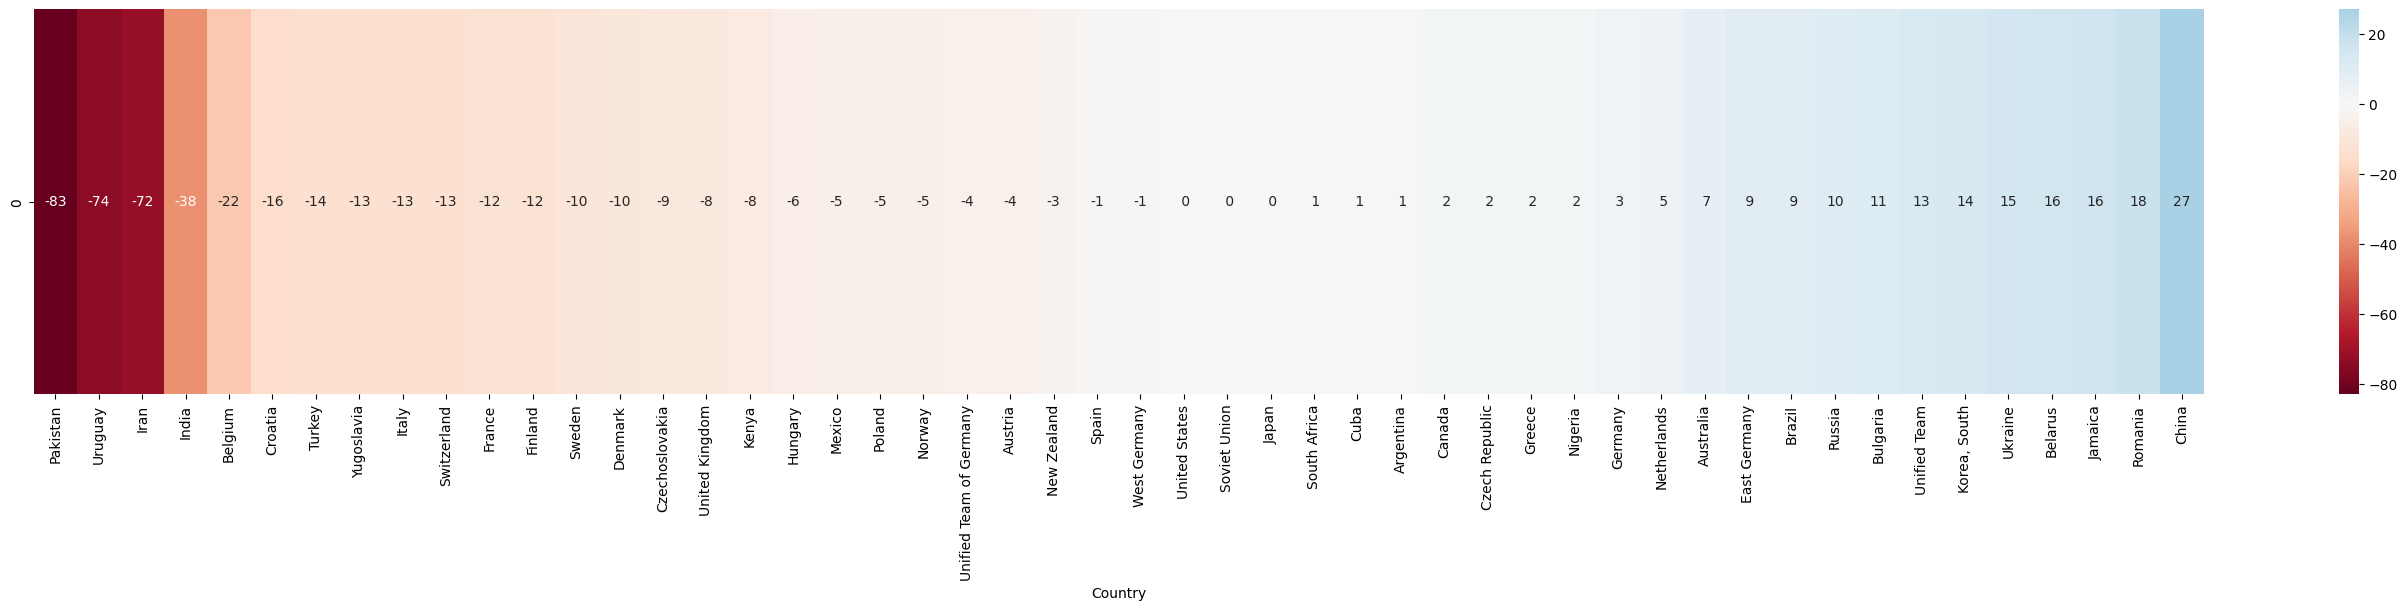

In [ ]:
# heatmap of difference between number of men's medals and women's medals for top 50 countries
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff2.T, cmap='RdBu', annot=True ,fmt='2.0f', center = 0)
plt.show()

#Do Traditions Matter?

In [ ]:
olympics
# different countries has different national sports

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [ ]:
olympics["Sport"].value_counts()

Aquatics             4170
Athletics            3637
Rowing               2667
Gymnastics           2307
Skiing               1781
Fencing              1613
Ice Hockey           1563
Football             1497
Hockey               1422
Skating              1256
Wrestling            1211
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         591
Judo                  491
Bobsleigh             452
Biathlon              420
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Softball              180
Luge                  180
Modern Pentathlon     180
Curling               172
Badminton             144
Table Tennis          144
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacrosse    

In [ ]:
# save sports in order of importance
sports = olympics["Sport"].value_counts().index
sports

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Softball', 'Luge', 'Modern Pentathlon', 'Curling', 'Badminton',
       'Table Tennis', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Roque', 'Jeu de paume'],
      dtype='object')

In [ ]:
olympics["Country"].value_counts().head(20)

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Russia            1031
Norway            1011
East Germany       987
Netherlands        973
Finland            890
China              889
Japan              851
Switzerland        665
Romania            642
Korea, South       616
Name: Country, dtype: int64

In [ ]:
# save top 20 countries
top_20 = olympics["Country"].value_counts().head(20).index
top_20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object')

In [ ]:
by_sport = pd.crosstab(olympics["Country"], olympics["Sport"])
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,11,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9
West Indies Federation,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,91,0,2,0,0,96,0,0,0,11,...,0,4,0,0,0,0,24,0,0,16


In [ ]:
pd.__version__

'1.5.3'

In [ ]:
by_sport = by_sport.rank(ascending = False, method = "average")
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,19.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Algeria,101.0,84.0,47.0,78.0,76.0,83.0,74.0,84.5,80.5,35.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Argentina,41.0,84.0,53.5,78.0,76.0,11.5,74.0,84.5,80.5,9.0,...,75.0,79.0,28.0,12.0,79.0,76.5,17.0,74.0,45.5,103.0
Armenia,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,35.5,40.0
Australasia,30.5,84.0,88.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,31.0,79.0,76.5,86.0,74.0,103.5,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,18.0,84.0,16.0,78.0,76.0,83.0,74.0,9.0,6.5,35.0,...,75.0,79.0,89.5,21.0,79.0,76.5,86.0,74.0,28.5,32.0
West Indies Federation,101.0,84.0,53.5,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Yugoslavia,16.0,84.0,70.0,78.0,76.0,3.0,74.0,84.5,80.5,25.5,...,75.0,5.5,89.5,90.5,79.0,76.5,12.0,74.0,103.5,20.0


In [ ]:
by_sport = by_sport.loc[top_20, sports].copy()
by_sport

,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
United States,1.0,1.0,1.0,2.0,8.0,7.0,2.0,1.0,12.0,1.0,...,3.0,1.0,9.5,74.0,73.5,73.5,74.0,74.0,1.0,2.0
Soviet Union,4.0,3.0,7.0,1.0,5.0,4.0,5.0,3.0,11.0,4.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
United Kingdom,10.5,2.0,2.0,19.0,34.5,15.0,10.0,20.0,5.0,16.0,...,2.0,2.0,5.0,1.5,1.0,73.5,1.0,74.0,73.5,1.0
Germany,5.0,7.0,5.0,16.0,6.0,6.0,13.0,7.5,4.0,9.0,...,74.5,74.5,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
France,14.0,8.0,11.0,17.0,10.0,2.0,79.5,23.0,83.0,17.0,...,74.5,74.5,79.0,1.5,73.5,1.0,2.0,1.5,73.5,74.0
Italy,12.0,14.0,8.0,8.5,9.0,1.0,79.5,7.5,83.0,11.5,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Sweden,15.0,9.0,30.0,5.0,4.0,12.0,3.0,13.5,83.0,15.0,...,74.5,74.5,9.5,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Canada,13.0,12.5,3.0,30.5,12.0,90.0,1.0,22.0,83.0,2.0,...,1.0,3.0,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Australia,2.0,12.5,9.0,37.0,21.5,90.0,79.5,90.5,2.0,24.0,...,74.5,74.5,1.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Hungary,3.0,18.5,32.0,7.0,91.5,3.0,79.5,4.0,83.0,20.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0


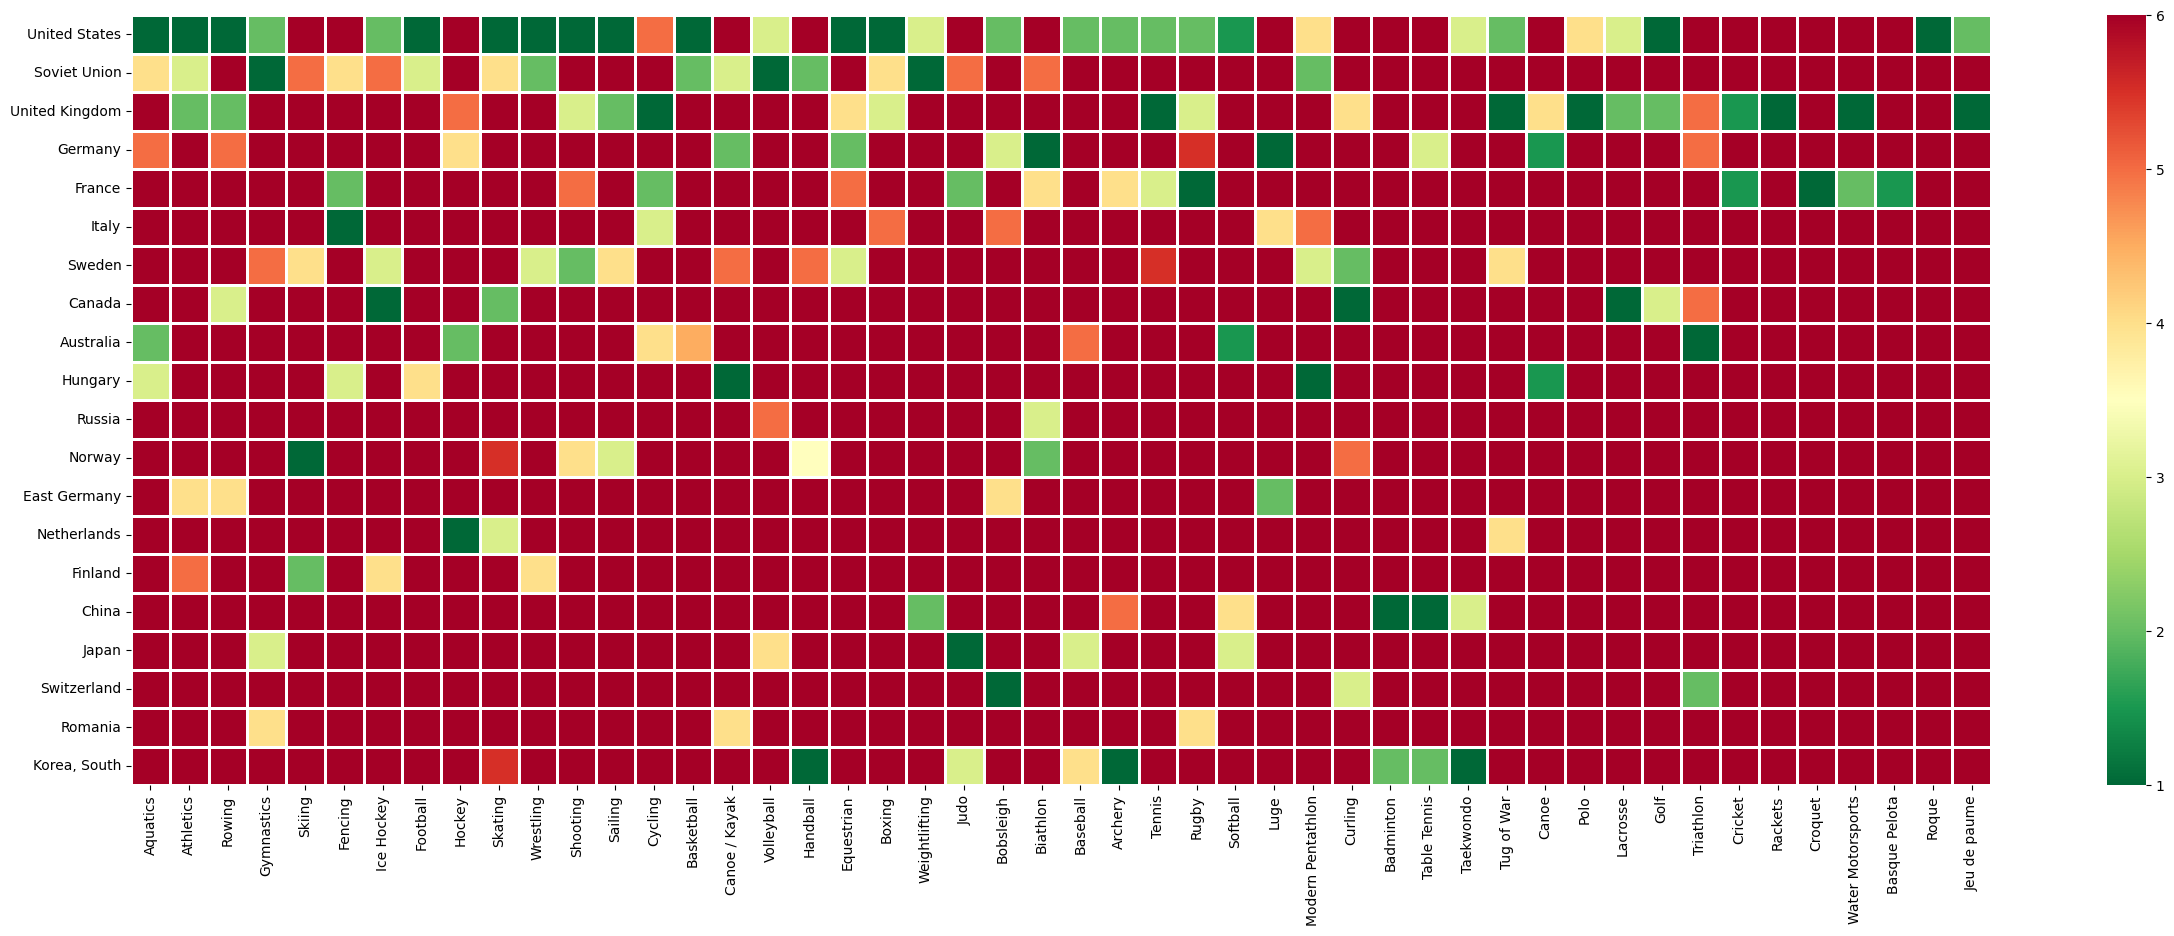

In [ ]:
plt.figure(figsize = (30, 10))
sns.heatmap(by_sport,cmap='RdYlGn_r', vmin = 1, vmax = 6, linewidth = 1)
plt.show()